# Radius - density - mass relation for small planets around M Dwarfs

**Author: [Hannu Parviainen](mailto:hpparvi@gmail.com)** </br>
**Last edited: 19. October 2023**

In [1]:
%matplotlib inline

In [2]:
from matplotlib.pyplot import subplots, setp
from matplotlib import cm

from spright import RMRelation
from spright.model import plot_model_means

## Initialise RadiusMassRelation

In [3]:
rmr = RMRelation('stpm')

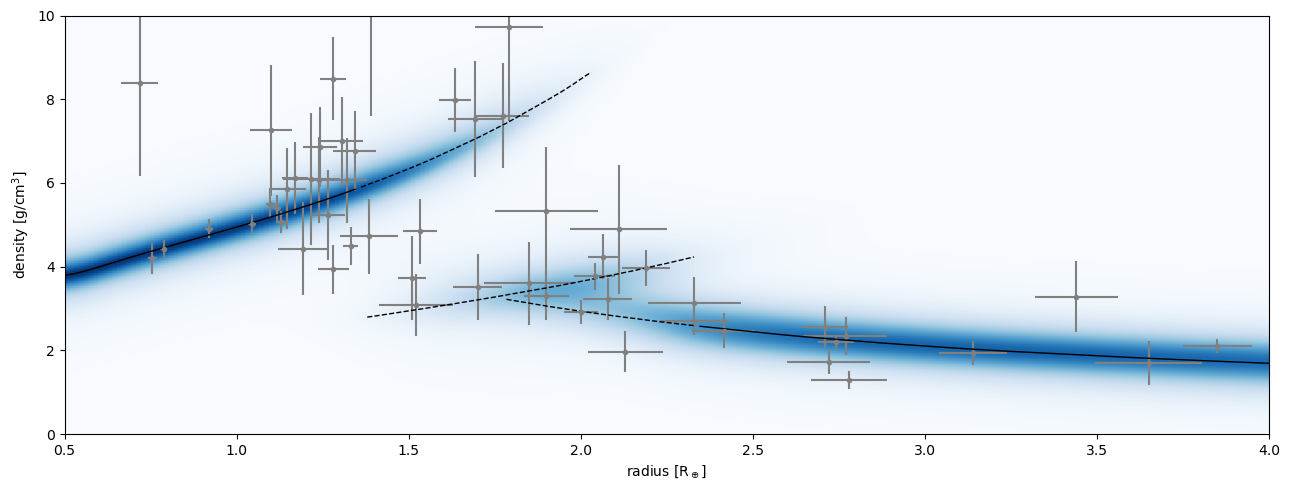

In [4]:
fig, ax = subplots(figsize=(13, 5))
rmr.rdmap.plot_map(ax=ax, cm=cm.Blues)
ax.errorbar(rmr.catalog.radius, rmr.catalog.density, xerr=rmr.catalog.radius_e, yerr=rmr.catalog.density_e, fmt= '.', c='0.5')
plot_model_means(rmr.posterior_samples.values, rmr.rdm, 'density', ax)
setp(ax, xlim=(0.5, 4), ylim=(0, 10))
fig.tight_layout()

## Calculate the density and mass distributions

After the initialization, we can obtain a planet density or mass sample given the planet radius with its uncertainty using the `RadiusMassRelation.sample` method. The method returns a `Distribution` object that stores the samples and also includes methods for plotting the distribution etc.

Density distribution                     Mass distribution                       
size: 5000                               size: 5000                              
is bimodal: True                         is bimodal: True                        
                                                                                 
Median: 3.78,                            Median: 4.34,                           
64% limits: [2.9 7.5],                   64% limits: [3.  7.5],                  
95% limits: [2.  8.5]                    95% limits: [ 2.1 10.1]                 
                                                                                 
Distribution model:                      Distribution model:                     
  0.61 × T(m=3.27, σ=0.50, λ=3.48)         0.59 × T(m=3.59, σ=0.79, λ=7.00)      
+ 0.39 × T(m=7.31, σ=0.62, λ=4.19)       + 0.41 × T(m=7.06, σ=1.67, λ=7.00)      


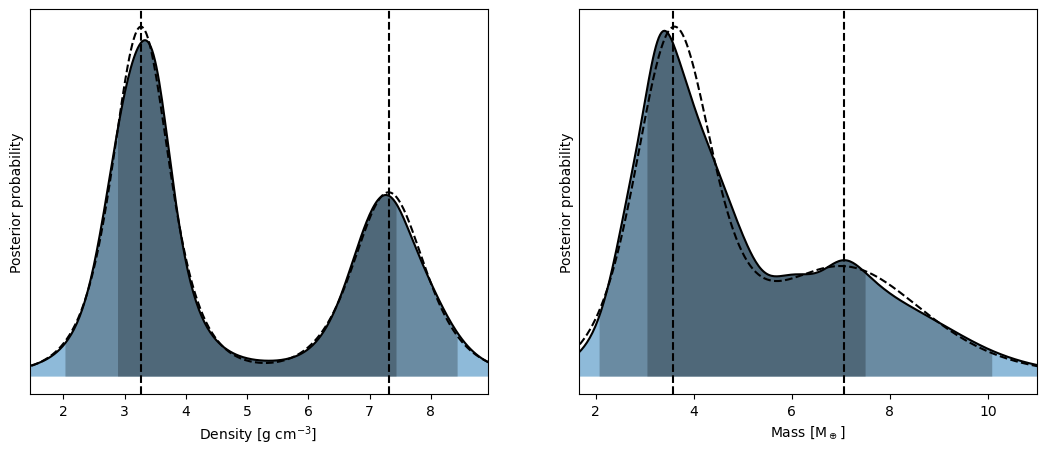

In [5]:
r, re = 1.8, 0.1
fig, axs = subplots(1, 2, figsize=(13,5))

density_distribution = rmr.sample('density', (r, re), 20_000)
density_distribution.plot(ax=axs[0])

mass_distribution = rmr.sample('mass', (r, re), 20_000)
mass_distribution.plot(ax=axs[1])

for ld, lm in zip(str(density_distribution).split('\n'), str(mass_distribution).split('\n')):
    print(f"{ld:40s} {lm:40s}")

---
<center>
   &copy; 2023 Hannu Parviainen
</center>